In [1]:
#1. import libraries
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#2. load csv
path_to_dataset = "healthcare-dataset-stroke-data.csv"
train = pd.read_csv(path_to_dataset)

In [3]:
train.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#3. missing data handling
#3.1. null count
train.isnull().sum()
##Missing in BMI 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#train.gender.unique()
#3.2. unique values
#get the columns in dataset
columns_np_array = train.columns.values
columns_np_array = np.delete(columns_np_array,[0,2,8,9])
#print(columns_np_array)

for i in columns_np_array:
    print(i+":")
    print(train[i].unique())
    print()

gender:
['Male' 'Female' 'Other']

hypertension:
[0 1]

heart_disease:
[1 0]

ever_married:
['Yes' 'No']

work_type:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type:
['Urban' 'Rural']

smoking_status:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']

stroke:
[1 0]



In [6]:
#3.3. filling missing data
#target column bmi
mean = train['bmi'].mean()
median = train['bmi'].median()
mode = train['bmi'].mode()
print(mean,median,mode)
train['filled_bmi'] = train['bmi'].fillna(mean)
#train['bmi'].fillna(mean)


28.893236911794666 28.1 0    28.7
Name: bmi, dtype: float64


In [7]:
#3.4. filling missing data
#target column smoking_status
train.groupby('smoking_status').size()
#len(train)
#train["filled_s_s"] = train.smoking_status.replace('Unknown',"never smoked")
train["filled_s_s"] = train.smoking_status.replace('Unknown',train.smoking_status.mode().values[0])


In [8]:
train.smoking_status.mode().values[0]

'never smoked'

In [9]:
#4. drop unnecessary columns
train.drop(['id','bmi','smoking_status'], axis="columns",inplace=True)
#train = train.drop(['id','bmi','smoking_status'], axis="columns")

In [10]:
#5. turn into categorical
columns_np_array = train.columns
for i in columns_np_array:
    print(i+":")
    print(train[i].unique())
    print()

gender:
['Male' 'Female' 'Other']

age:
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]

hypertens

In [11]:
gender_map = {'Male':0, 'Female':1, 'Other':2}
train.gender = train.gender.map(gender_map)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,filled_bmi,filled_s_s
0,0,67.0,0,1,Yes,Private,Urban,228.69,1,36.600000,formerly smoked
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,1,28.893237,never smoked
2,0,80.0,0,1,Yes,Private,Rural,105.92,1,32.500000,never smoked
3,1,49.0,0,0,Yes,Private,Urban,171.23,1,34.400000,smokes
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,1,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,Private,Urban,83.75,0,28.893237,never smoked
5106,1,81.0,0,0,Yes,Self-employed,Urban,125.20,0,40.000000,never smoked
5107,1,35.0,0,0,Yes,Self-employed,Rural,82.99,0,30.600000,never smoked
5108,0,51.0,0,0,Yes,Private,Rural,166.29,0,25.600000,formerly smoked


In [12]:
ever_married_map={'Yes':0, 'No':1}
work_type_map = {'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
Residence_type_map = {'Urban':0, 'Rural':1}
filled_s_s_map = {'formerly smoked':0, 'never smoked':1, 'smokes':2}

train.ever_married =  train.ever_married.map(ever_married_map)
train.work_type =  train.work_type.map(work_type_map)
train.Residence_type =  train.Residence_type.map(Residence_type_map)
train.filled_s_s =  train.filled_s_s.map(filled_s_s_map)
train


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,filled_bmi,filled_s_s
0,0,67.0,0,1,0,0,0,228.69,1,36.600000,0
1,1,61.0,0,0,0,1,1,202.21,1,28.893237,1
2,0,80.0,0,1,0,0,1,105.92,1,32.500000,1
3,1,49.0,0,0,0,0,0,171.23,1,34.400000,2
4,1,79.0,1,0,0,1,1,174.12,1,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,0,83.75,0,28.893237,1
5106,1,81.0,0,0,0,1,0,125.20,0,40.000000,1
5107,1,35.0,0,0,0,1,1,82.99,0,30.600000,1
5108,0,51.0,0,0,0,0,1,166.29,0,25.600000,0


In [13]:
#####downsampling and upsampling#######
#this step is not necessary if the dataset is balanced
from sklearn.utils import resample
minority_class = train.loc[train['stroke']==1]
minority_upsampled = resample(minority_class, replace=True, n_samples=2000,random_state=3)
print(len(minority_upsampled))


majority_class = train.loc[train['stroke']==0]
majority_downsampled = resample(majority_class, replace=True, n_samples=2000,random_state=3)
print(len(majority_downsampled))

train = pd.concat([majority_downsampled,minority_upsampled]) #a list of dataframes

2000
2000


<AxesSubplot:title={'center':'Correlation'}>

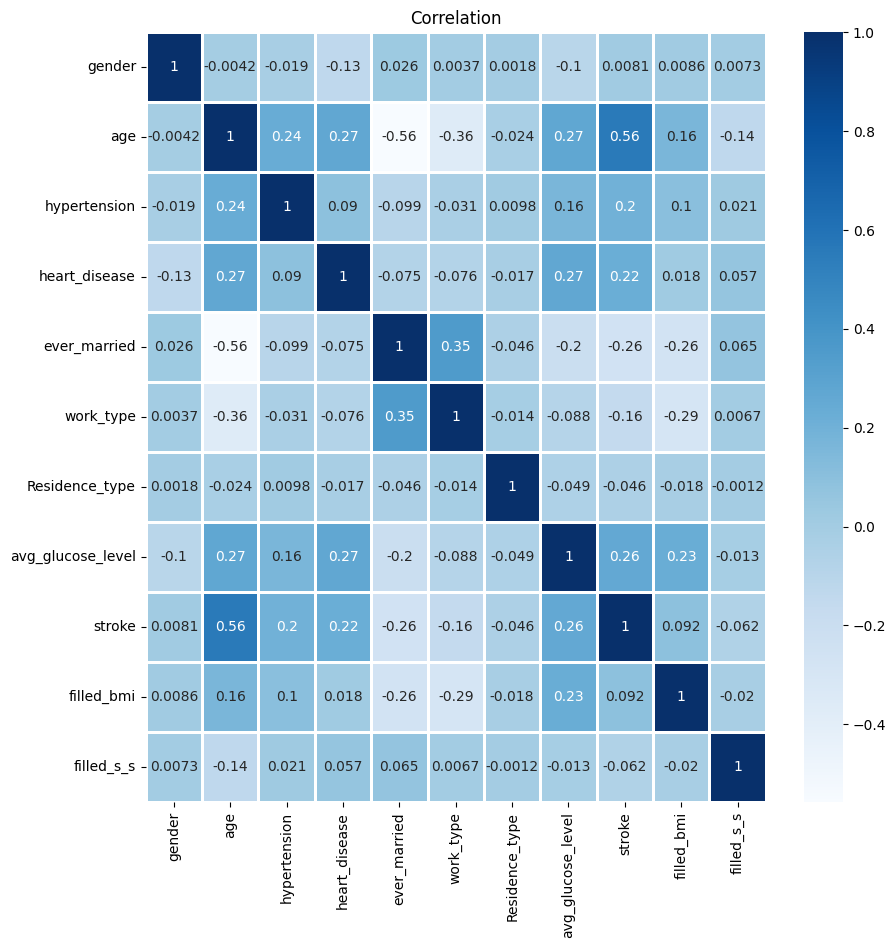

In [14]:
#6.Correlation
plt.figure(figsize=(10,10))
plt.title("Correlation")
sns.heatmap(
    train.corr(),
    cmap="Blues",
    annot=True,linewidths=1
    )

In [15]:
#7. splitting data into x and y
y = train.stroke
x = train.drop('stroke', axis=1)


In [17]:
#8. train test split
import sklearn.model_selection


x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,random_state=3,test_size=.2,shuffle=True)


from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight="balanced", classes=np.unique(y_train.values), y=y_train)
print(class_weight)

[0.99502488 1.00502513]


Train metrics


              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1608
           1       0.72      0.79      0.75      1592

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.75      0.74      0.74      3200




Test metrics


              precision    recall  f1-score   support

           0       0.76      0.71      0.73       392
           1       0.74      0.78      0.76       408

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800






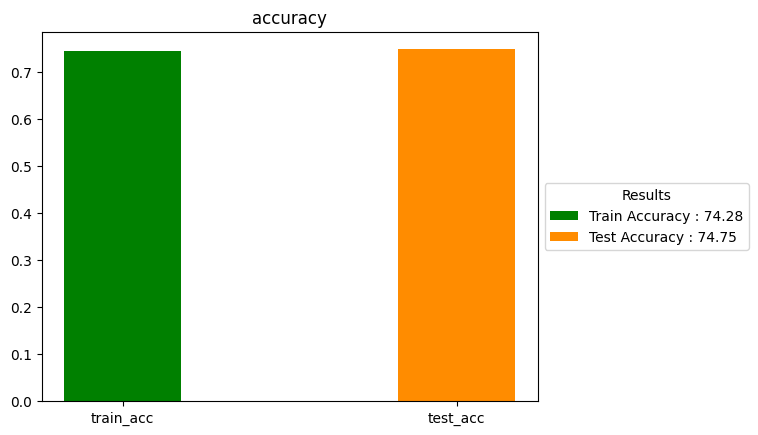

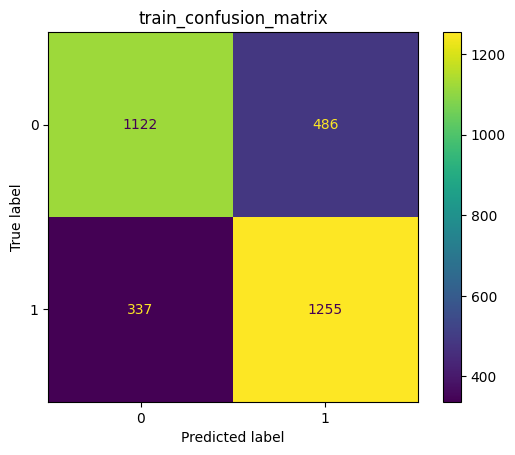

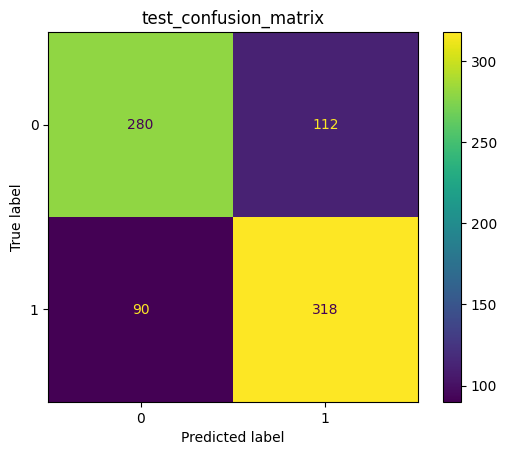

In [33]:
#9. linear model 
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE


linear_model = LinearRegression()

#RFE for linear model

selector_linear = RFE(linear_model,n_features_to_select=8,step=1)
selector_linear = selector_linear.fit(x,y)

#9.1. select features
#selector_linear.support_
x_train_linear = x_train.iloc[:,selector_linear.support_] 
x_test_linear = x_test.iloc[:,selector_linear.support_]

#9.2. model training
linear_model = linear_model.fit(x_train_linear,y_train)



#9.3. accuracy calculation and printing
y_train_linear = linear_model.predict(x_train_linear)
y_test_linear = linear_model.predict(x_test_linear)
###### this section is only necessary if we want to classify using linear regression #######

for i in range(len(y_train_linear)):
    if y_train_linear[i] >= .5:
        y_train_linear[i] = 1
    else:
        y_train_linear[i]=0

for i in range(len(y_test_linear)):
    if y_test_linear[i] >= .5:
        y_test_linear[i] = 1
    else:
        y_test_linear[i]=0

###### this section is only necessary if we want to classify using linear regression #######

import sklearn.metrics
#accuracy
linear_train_acc = sklearn.metrics.accuracy_score(y_train,y_train_linear)
linear_test_acc = sklearn.metrics.accuracy_score(y_test,y_test_linear)

#confusion matrix
linear_train_confusion_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_linear)
linear_test_confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_linear)

#classification report
linear_train_classification_report = sklearn.metrics.classification_report(y_train, y_train_linear, target_names=['0','1'])
linear_test_classification_report = sklearn.metrics.classification_report(y_test, y_test_linear, target_names=['0','1'])


linear_train_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=linear_train_confusion_matrix, display_labels=[0,1])
linear_test_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=linear_test_confusion_matrix, display_labels=[0,1])

plt.bar([1],linear_train_acc,width=.35,color="green",label="Train Accuracy : "+str(linear_train_acc*100)[:5])
plt.bar([2],linear_test_acc,width=.35,color="darkorange",label="Test Accuracy : "+str(linear_test_acc*100)[:5])
plt.xticks([1,2],["train_acc","test_acc"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")
plt.title("linear accuracy")

print("===========================================")
print("Train metrics")
print("===========================================")

linear_train_confusion_matrix_display.plot()
plt.title("linear_train_confusion_matrix")

print("\n")
print(linear_train_classification_report)
print("\n\n")
print("===========================================")
print("Test metrics")
print("===========================================")

linear_test_confusion_matrix_display.plot()
plt.title("linear_test_confusion_matrix")

print("\n")
print(linear_test_classification_report)
print("\n\n")



Train metrics


              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1608
           1       0.73      0.77      0.75      1592

    accuracy                           0.75      3200
   macro avg       0.75      0.75      0.75      3200
weighted avg       0.75      0.75      0.75      3200




Test metrics


              precision    recall  f1-score   support

           0       0.75      0.73      0.74       392
           1       0.75      0.76      0.76       408

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800






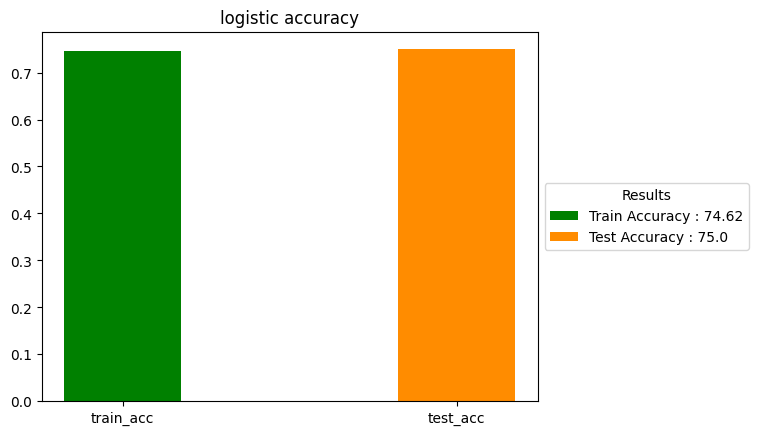

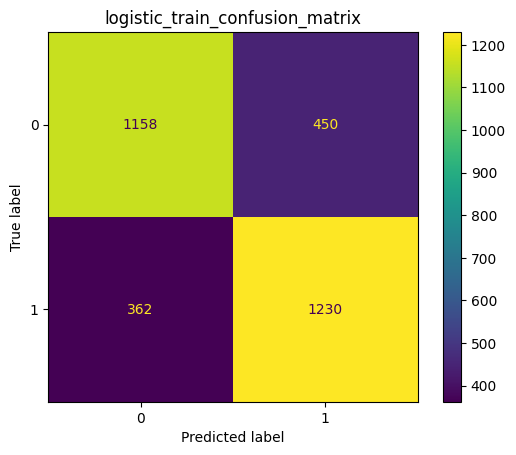

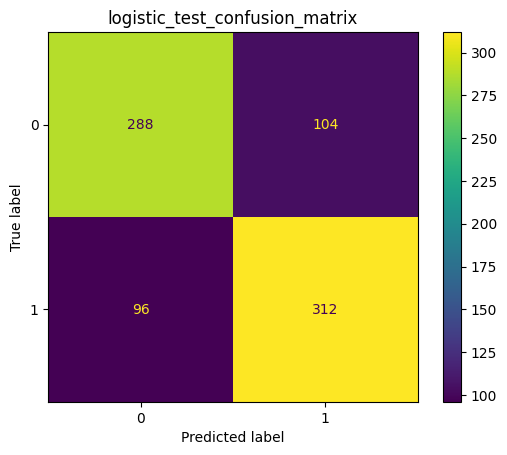

In [ ]:
#9. logistic model 
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE


logistic_model = LogisticRegression(random_state=3, max_iter=1000)

#RFE for logistic model

selector_logistic = RFE(logistic_model,n_features_to_select=8,step=1)
selector_logistic = selector_logistic.fit(x,y)

#9.1. select features
#selector_logistic.support_
x_train_logistic = x_train.iloc[:,selector_logistic.support_] 
x_test_logistic = x_test.iloc[:,selector_logistic.support_]

#9.2. model training
logistic_model = logistic_model.fit(x_train_logistic,y_train)



#9.3. accuracy calculation and printing
y_train_logistic = logistic_model.predict(x_train_logistic)
y_test_logistic = logistic_model.predict(x_test_logistic)
###### this section is only necessary if we want to classify using logistic regression #######

# for i in range(len(y_train_logistic)):
#     if y_train_logistic[i] >= .5:
#         y_train_logistic[i] = 1
#     else:
#         y_train_logistic[i]=0

# for i in range(len(y_test_logistic)):
#     if y_test_logistic[i] >= .5:
#         y_test_logistic[i] = 1
#     else:
#         y_test_logistic[i]=0

###### this section is only necessary if we want to classify using logistic regression #######

import sklearn.metrics
#accuracy
logistic_train_acc = sklearn.metrics.accuracy_score(y_train,y_train_logistic)
logistic_test_acc = sklearn.metrics.accuracy_score(y_test,y_test_logistic)

#confusion matrix
logistic_train_confusion_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_logistic)
logistic_test_confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_logistic)

#classification report
logistic_train_classification_report = sklearn.metrics.classification_report(y_train, y_train_logistic, target_names=['0','1'])
logistic_test_classification_report = sklearn.metrics.classification_report(y_test, y_test_logistic, target_names=['0','1'])


logistic_train_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=logistic_train_confusion_matrix, display_labels=[0,1])
logistic_test_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=logistic_test_confusion_matrix, display_labels=[0,1])

plt.bar([1],logistic_train_acc,width=.35,color="green",label="Train Accuracy : "+str(logistic_train_acc*100)[:5])
plt.bar([2],logistic_test_acc,width=.35,color="darkorange",label="Test Accuracy : "+str(logistic_test_acc*100)[:5])
plt.xticks([1,2],["train_acc","test_acc"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")
plt.title("logistic accuracy")

print("===========================================")
print("Train metrics")
print("===========================================")

logistic_train_confusion_matrix_display.plot()
plt.title("logistic_train_confusion_matrix")

print("\n")
print(logistic_train_classification_report)
print("\n\n")
print("===========================================")
print("Test metrics")
print("===========================================")

logistic_test_confusion_matrix_display.plot()
plt.title("logistic_test_confusion_matrix")

print("\n")
print(logistic_test_classification_report)
print("\n\n")



Train metrics


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1608
           1       0.77      0.93      0.84      1592

    accuracy                           0.83      3200
   macro avg       0.84      0.83      0.83      3200
weighted avg       0.84      0.83      0.83      3200




Test metrics


              precision    recall  f1-score   support

           0       0.90      0.72      0.80       392
           1       0.77      0.92      0.84       408

    accuracy                           0.82       800
   macro avg       0.84      0.82      0.82       800
weighted avg       0.83      0.82      0.82       800






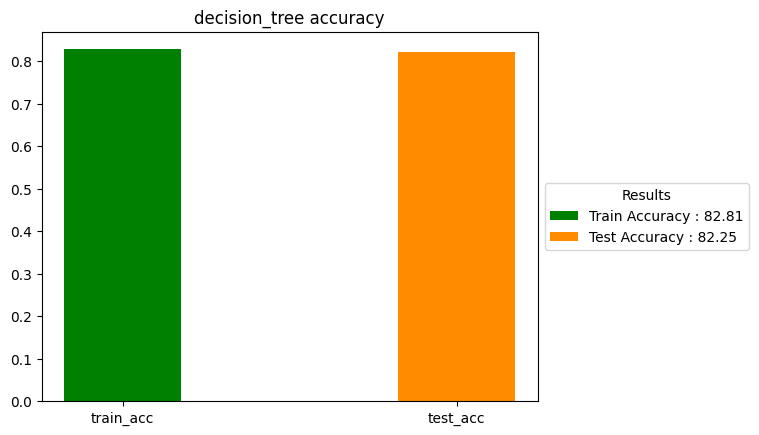

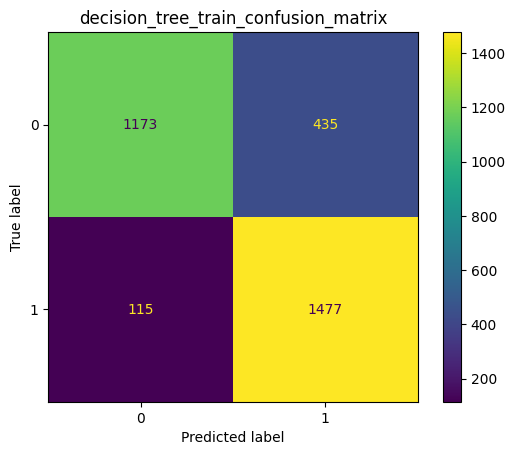

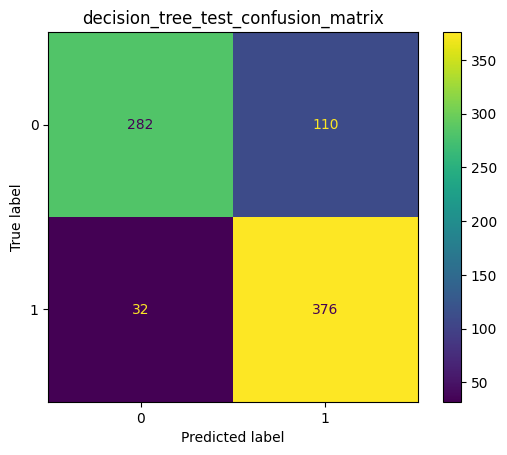

In [ ]:
#9. logistic model 
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE


decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=3)

#RFE for decision_tree model

selector_decision_tree = RFE(decision_tree_model,n_features_to_select=8,step=1)
selector_decision_tree = selector_decision_tree.fit(x,y)

#9.1. select features
#selector_decision_tree.support_
x_train_decision_tree = x_train.iloc[:,selector_decision_tree.support_] 
x_test_decision_tree = x_test.iloc[:,selector_decision_tree.support_]

#9.2. model training
decision_tree_model = decision_tree_model.fit(x_train_decision_tree,y_train)



#9.3. accuracy calculation and printing
y_train_decision_tree = decision_tree_model.predict(x_train_decision_tree)
y_test_decision_tree = decision_tree_model.predict(x_test_decision_tree)
###### this section is only necessary if we want to classify using decision_tree regression #######

# for i in range(len(y_train_decision_tree)):
#     if y_train_decision_tree[i] >= .5:
#         y_train_decision_tree[i] = 1
#     else:
#         y_train_decision_tree[i]=0

# for i in range(len(y_test_decision_tree)):
#     if y_test_decision_tree[i] >= .5:
#         y_test_decision_tree[i] = 1
#     else:
#         y_test_decision_tree[i]=0

###### this section is only necessary if we want to classify using decision_tree regression #######

import sklearn.metrics
#accuracy
decision_tree_train_acc = sklearn.metrics.accuracy_score(y_train,y_train_decision_tree)
decision_tree_test_acc = sklearn.metrics.accuracy_score(y_test,y_test_decision_tree)

#confusion matrix
decision_tree_train_confusion_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_decision_tree)
decision_tree_test_confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_decision_tree)

#classification report
decision_tree_train_classification_report = sklearn.metrics.classification_report(y_train, y_train_decision_tree, target_names=['0','1'])
decision_tree_test_classification_report = sklearn.metrics.classification_report(y_test, y_test_decision_tree, target_names=['0','1'])


decision_tree_train_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=decision_tree_train_confusion_matrix, display_labels=[0,1])
decision_tree_test_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=decision_tree_test_confusion_matrix, display_labels=[0,1])

plt.bar([1],decision_tree_train_acc,width=.35,color="green",label="Train Accuracy : "+str(decision_tree_train_acc*100)[:5])
plt.bar([2],decision_tree_test_acc,width=.35,color="darkorange",label="Test Accuracy : "+str(decision_tree_test_acc*100)[:5])
plt.xticks([1,2],["train_acc","test_acc"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")
plt.title("decision_tree accuracy")

print("===========================================")
print("Train metrics")
print("===========================================")

decision_tree_train_confusion_matrix_display.plot()
plt.title("decision_tree_train_confusion_matrix")

print("\n")
print(decision_tree_train_classification_report)
print("\n\n")
print("===========================================")
print("Test metrics")
print("===========================================")

decision_tree_test_confusion_matrix_display.plot()
plt.title("decision_tree_test_confusion_matrix")

print("\n")
print(decision_tree_test_classification_report)
print("\n\n")



Train metrics


              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1608
           1       0.72      0.88      0.79      1592

    accuracy                           0.77      3200
   macro avg       0.78      0.77      0.76      3200
weighted avg       0.78      0.77      0.76      3200




Test metrics


              precision    recall  f1-score   support

           0       0.85      0.66      0.75       392
           1       0.73      0.89      0.80       408

    accuracy                           0.78       800
   macro avg       0.79      0.78      0.77       800
weighted avg       0.79      0.78      0.78       800






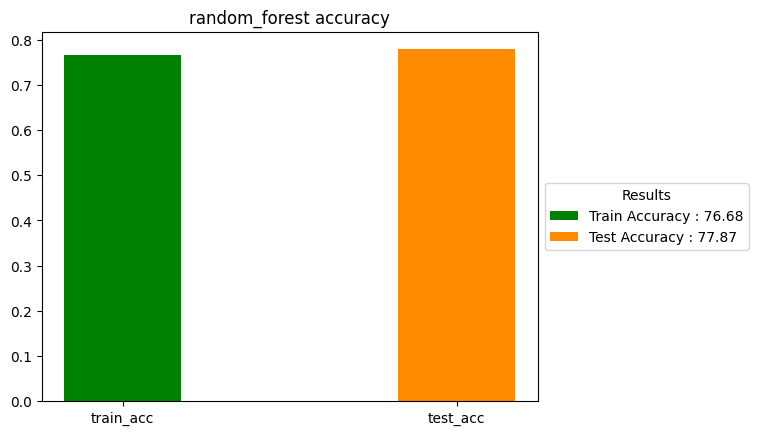

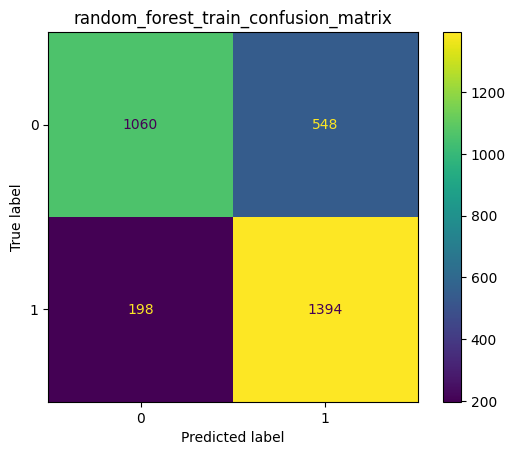

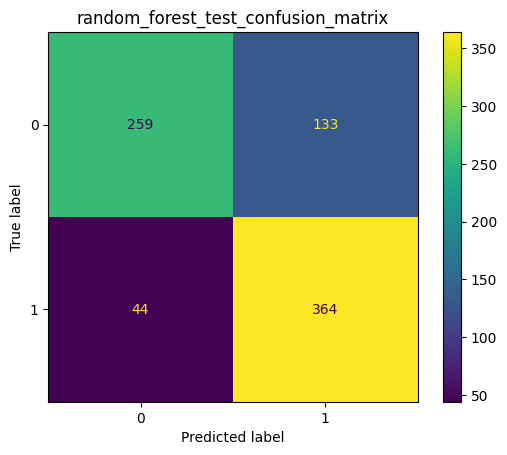

In [38]:
#9. logistic model 
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE


random_forest_model = RandomForestClassifier(n_estimators=100, random_state=3, max_depth=3)

#RFE for random_forest model

selector_random_forest = RFE(random_forest_model,n_features_to_select=8,step=1)
selector_random_forest = selector_random_forest.fit(x,y)

#9.1. select features
#selector_random_forest.support_
x_train_random_forest = x_train.iloc[:,selector_random_forest.support_] 
x_test_random_forest = x_test.iloc[:,selector_random_forest.support_]

#9.2. model training
random_forest_model = random_forest_model.fit(x_train_random_forest,y_train)



#9.3. accuracy calculation and printing
y_train_random_forest = random_forest_model.predict(x_train_random_forest)
y_test_random_forest = random_forest_model.predict(x_test_random_forest)
###### this section is only necessary if we want to classify using random_forest regression #######

# for i in range(len(y_train_random_forest)):
#     if y_train_random_forest[i] >= .5:
#         y_train_random_forest[i] = 1
#     else:
#         y_train_random_forest[i]=0

# for i in range(len(y_test_random_forest)):
#     if y_test_random_forest[i] >= .5:
#         y_test_random_forest[i] = 1
#     else:
#         y_test_random_forest[i]=0

###### this section is only necessary if we want to classify using random_forest regression #######

import sklearn.metrics
#accuracy
random_forest_train_acc = sklearn.metrics.accuracy_score(y_train,y_train_random_forest)
random_forest_test_acc = sklearn.metrics.accuracy_score(y_test,y_test_random_forest)

#confusion matrix
random_forest_train_confusion_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_random_forest)
random_forest_test_confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_random_forest)

#classification report
random_forest_train_classification_report = sklearn.metrics.classification_report(y_train, y_train_random_forest, target_names=['0','1'])
random_forest_test_classification_report = sklearn.metrics.classification_report(y_test, y_test_random_forest, target_names=['0','1'])


random_forest_train_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=random_forest_train_confusion_matrix, display_labels=[0,1])
random_forest_test_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=random_forest_test_confusion_matrix, display_labels=[0,1])

plt.bar([1],random_forest_train_acc,width=.35,color="green",label="Train Accuracy : "+str(random_forest_train_acc*100)[:5])
plt.bar([2],random_forest_test_acc,width=.35,color="darkorange",label="Test Accuracy : "+str(random_forest_test_acc*100)[:5])
plt.xticks([1,2],["train_acc","test_acc"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")
plt.title("random_forest accuracy")

print("===========================================")
print("Train metrics")
print("===========================================")

random_forest_train_confusion_matrix_display.plot()
plt.title("random_forest_train_confusion_matrix")

print("\n")
print(random_forest_train_classification_report)
print("\n\n")
print("===========================================")
print("Test metrics")
print("===========================================")

random_forest_test_confusion_matrix_display.plot()
plt.title("random_forest_test_confusion_matrix")

print("\n")
print(random_forest_test_classification_report)
print("\n\n")



Train metrics


              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1608
           1       0.72      0.79      0.75      1592

    accuracy                           0.75      3200
   macro avg       0.75      0.75      0.75      3200
weighted avg       0.75      0.75      0.75      3200




Test metrics


              precision    recall  f1-score   support

           0       0.77      0.70      0.73       392
           1       0.74      0.80      0.77       408

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800






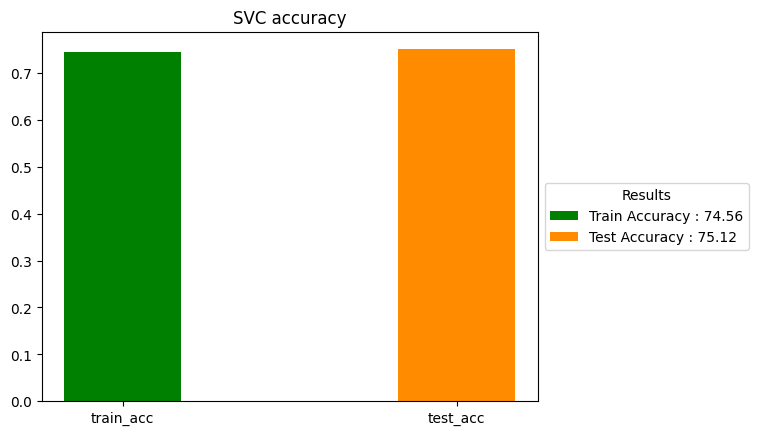

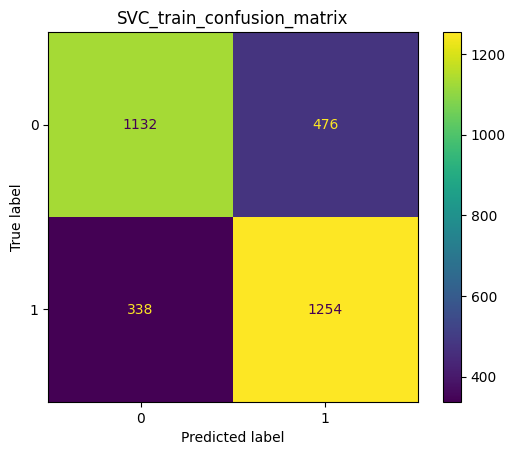

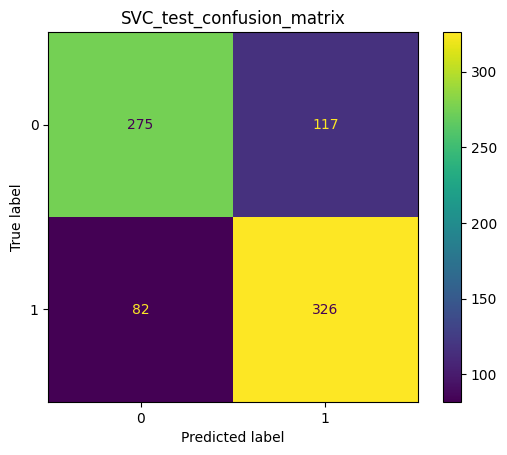

In [ ]:
#9. logistic model 
from sklearn.svm import SVC

from sklearn.feature_selection import RFE


SVC_model = SVC(random_state=3)

#RFE for SVC model
#===================================================================SVC can not use RFE================================================#
# selector_SVC = RFE(SVC_model,n_features_to_select=8,step=1)
# selector_SVC = selector_SVC.fit(x,y)

#9.1. select features
#selector_SVC.support_
x_train_SVC = x_train
x_test_SVC = x_test

#9.2. model training
SVC_model = SVC_model.fit(x_train_SVC,y_train)



#9.3. accuracy calculation and printing
y_train_SVC = SVC_model.predict(x_train_SVC)
y_test_SVC = SVC_model.predict(x_test_SVC)
###### this section is only necessary if we want to classify using SVC regression #######

# for i in range(len(y_train_SVC)):
#     if y_train_SVC[i] >= .5:
#         y_train_SVC[i] = 1
#     else:
#         y_train_SVC[i]=0

# for i in range(len(y_test_SVC)):
#     if y_test_SVC[i] >= .5:
#         y_test_SVC[i] = 1
#     else:
#         y_test_SVC[i]=0

###### this section is only necessary if we want to classify using SVC regression #######

import sklearn.metrics
#accuracy
SVC_train_acc = sklearn.metrics.accuracy_score(y_train,y_train_SVC)
SVC_test_acc = sklearn.metrics.accuracy_score(y_test,y_test_SVC)

#confusion matrix
SVC_train_confusion_matrix = sklearn.metrics.confusion_matrix(y_train,y_train_SVC)
SVC_test_confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_SVC)

#classification report
SVC_train_classification_report = sklearn.metrics.classification_report(y_train, y_train_SVC, target_names=['0','1'])
SVC_test_classification_report = sklearn.metrics.classification_report(y_test, y_test_SVC, target_names=['0','1'])


SVC_train_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=SVC_train_confusion_matrix, display_labels=[0,1])
SVC_test_confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=SVC_test_confusion_matrix, display_labels=[0,1])

plt.bar([1],SVC_train_acc,width=.35,color="green",label="Train Accuracy : "+str(SVC_train_acc*100)[:5])
plt.bar([2],SVC_test_acc,width=.35,color="darkorange",label="Test Accuracy : "+str(SVC_test_acc*100)[:5])
plt.xticks([1,2],["train_acc","test_acc"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")
plt.title("SVC accuracy")

print("===========================================")
print("Train metrics")
print("===========================================")

SVC_train_confusion_matrix_display.plot()
plt.title("SVC_train_confusion_matrix")

print("\n")
print(SVC_train_classification_report)
print("\n\n")
print("===========================================")
print("Test metrics")
print("===========================================")

SVC_test_confusion_matrix_display.plot()
plt.title("SVC_test_confusion_matrix")

print("\n")
print(SVC_test_classification_report)
print("\n\n")

